# Pymaceuticals Inc.
---

### Analysis

- Capomulin was most effective around the 35 day mark when tumor size would reach its smallest size. Tumor size began to increase after 35 days on this drug regimen.
- The average tumor size per mouse increased as mouse weight increased. 
- Mouses on the Capomulin and Ramicane drug regimens had smaller tumor sizes

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID")


# Display the data table for preview
mouse_study_results_complete.head(250)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
245,k483,5,46.611056,0,Infubinol,Female,20,30
246,k483,10,50.296041,1,Infubinol,Female,20,30
247,k483,15,53.244458,1,Infubinol,Female,20,30
248,k483,20,54.778961,1,Infubinol,Female,20,30


In [2]:
# Checking the number of mice.
mouse_study_results_complete['Mouse ID'].nunique()


249

In [3]:
mouse_study_results_complete.size

15144

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [5]:
mouse_study_results_complete.shape


(1893, 8)

In [6]:
duplicates = mouse_study_results_complete[mouse_study_results_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicates


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#identify which mouse IDs are duplicates. You must add the column name at the end so that the machine knows what to compare it to. The use unique at the end to tell us which ID is the duplicate. 
duplicate_ID = mouse_study_results_complete[mouse_study_results_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]["Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# the isin function looks to see if the duplicate ID is in the mouse study results data frame and removes all occurrences of it. 
clean_mouse_df= mouse_study_results_complete[mouse_study_results_complete["Mouse ID"].isin(duplicate_ID)==False]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
clean_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [11]:
mean =  clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

median = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
standard_dev = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_reg_tumor_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev": standard_dev, "Tumor Volume Std Err.": sem})


drug_reg_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [13]:
clean_mouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])




,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

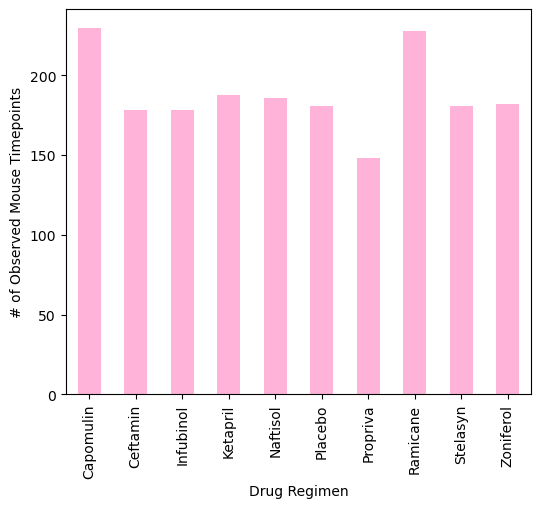

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen= clean_mouse_df.groupby(["Drug Regimen"])

drug_count = drug_regimen['Mouse ID'].count()

drug_count.plot(kind='bar', facecolor = '#ffb3d9',
                    xlabel = "Drug Regimen",
                    ylabel= "# of Observed Mouse Timepoints",
                    figsize=(6,5))



In [15]:
drug_regimen

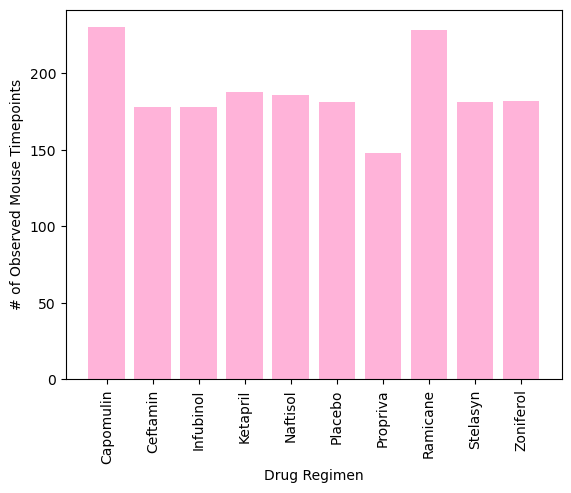

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_names = drug_count.index
drug_count = drug_regimen['Mouse ID'].count()

plt.bar(drug_names, drug_count, color = '#ffb3d9', align = 'center')
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


<Axes: ylabel='count'>

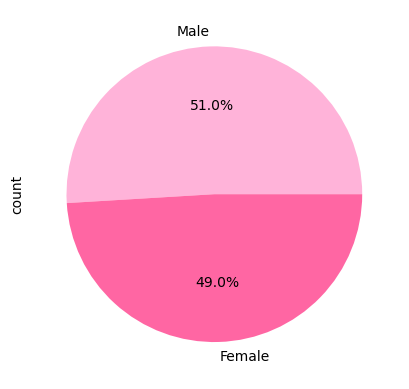

In [17]:
total_sex = clean_mouse_df['Sex'].value_counts()
total_sex.plot(kind='pie', labels = total_sex.index, colors = ['#ffb3d9', '#ff66a3'], autopct='%.1f%%')


([<matplotlib.patches.Wedge at 0x1ff04584350>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

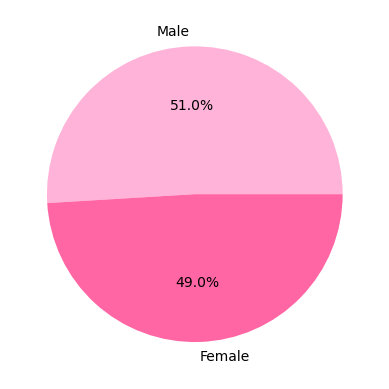

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
 
total_sex = clean_mouse_df['Sex'].value_counts()
total_sex_names = total_sex.index
colors = ['#ffb3d9', '#ff66a3']

figure2 = plt.pie(total_sex, labels = total_sex_names, colors = colors, autopct='%.1f%%')
figure2

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# possibly by calculating the 'max' of the timepoint value. I believe we can use groupby

maxTP = clean_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor_volumedf = pd.DataFrame(maxTP)

max_tumor_volumedf.reset_index(drop=False, inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time_point_volume_df = pd.merge(max_tumor_volumedf,clean_mouse_df, how='left')

In [20]:
clean_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []
for drugs in drug_treatments:
     tumor_volume = max_time_point_volume_df.loc[(max_time_point_volume_df["Drug Regimen"]==drugs),"Tumor Volume (mm3)"]
     tumor_volume_data.append(tumor_volume)
for i in range(len(tumor_volume_data)):

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
     quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = upperq - lowerq
     print(f"The IQR for {drug_treatments[i]} is {iqr}")
    # Locate the rows which contain mice on each drug and get the tumor volumes
     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr) 
     print(f"The lower bound for {drug_treatments[i]} is {lower_bound}")
     print(f"The upper bound for {drug_treatments[i]} is {upper_bound}")
    # add subset 

    
    # Determine outliers using upper and lower bounds


The IQR for Capomulin is 7.781863460000004
The lower bound for Capomulin is 20.70456164999999
The upper bound for Capomulin is 51.83201549
The IQR for Ramicane is 9.098536719999998
The lower bound for Ramicane is 17.912664470000003
The upper bound for Ramicane is 54.30681135
The IQR for Infubinol is 11.477135160000003
The lower bound for Infubinol is 36.83290494999999
The upper bound for Infubinol is 82.74144559000001
The IQR for Ceftamin is 15.577752179999997
The lower bound for Ceftamin is 25.355449580000002
The upper bound for Ceftamin is 87.66645829999999


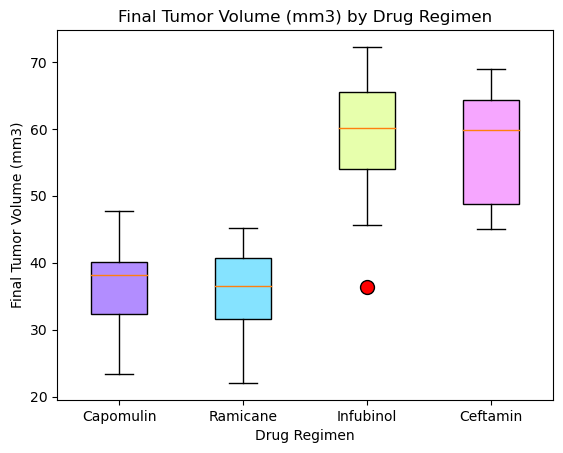

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10,
                  linestyle='none')
final_product = plt.boxplot(tumor_volume_data, patch_artist=True, labels =drug_treatments, flierprops=flierprops)
plt.title("Final Tumor Volume (mm3) by Drug Regimen")
plt.xticks([1,2,3,4],(drug_treatments))
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

colors = ['#b28dff', '#85e3ff', '#e7ffac','#f6a6ff']

for patch, color in zip(final_product['boxes'], colors):
    patch.set_facecolor(color)
plt.show()


## Line and Scatter Plots

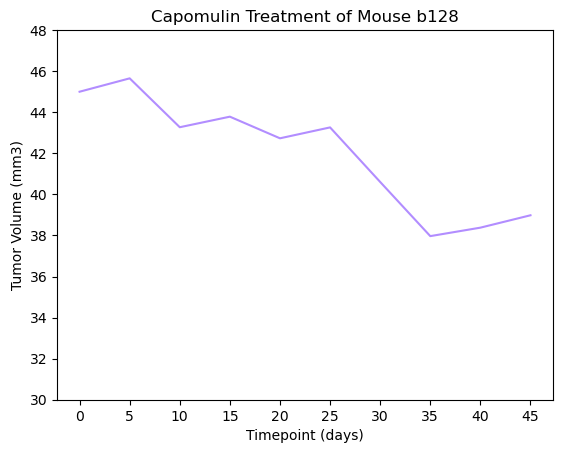

In [60]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_df = clean_mouse_df.loc[(clean_mouse_df['Mouse ID'] =='b128') & 
                                     (clean_mouse_df['Drug Regimen']=='Capomulin')]
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'], color='#b28dff')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse b128')
plt.xticks(np.arange(0,50,5))
plt.yticks(np.arange(30,50,2))
plt.show()

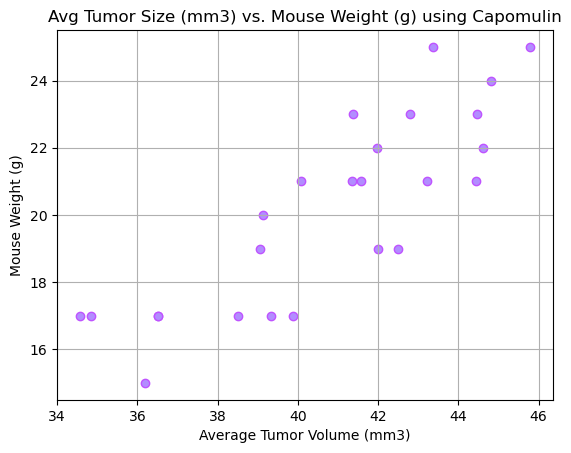

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_results.groupby(['Mouse ID'])['Weight (g)'].value_counts() 
# find the results that used capomullin
capomulin_results = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"]=="Capomulin")]
# find the average of the tumor volume of each mouse
average_volume = capomulin_results.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_results.groupby(['Mouse ID'])['Weight (g)'].mean()
plt.scatter(average_volume, mouse_weight, color='#b28dff', 
            edgecolor='#bf53ff')
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel('Mouse Weight (g)')
plt.title('Avg Tumor Size (mm3) vs. Mouse Weight (g) using Capomulin')
plt.grid()

                                  

## Correlation and Regression

The correlation between mouse weight and average observed tumor volume is 0.84


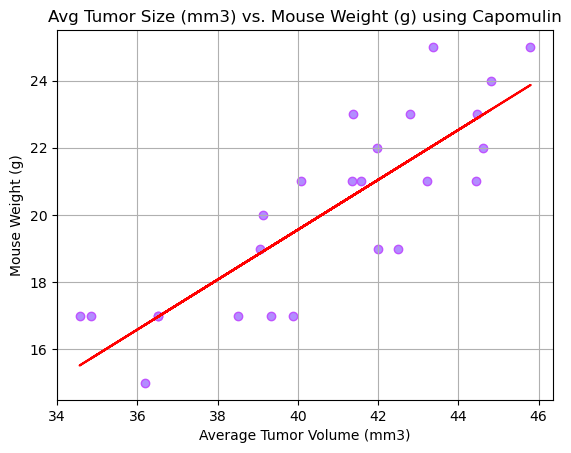

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and average observed tumor volume is {round(st.pearsonr(mouse_weight,average_volume)[0],2)}")

x_values = average_volume
y_values = mouse_weight
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values,color='#b28dff', edgecolor='#bf53ff')
plt.plot(x_values, regress_values,"r-")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel('Mouse Weight (g)')
plt.title('Avg Tumor Size (mm3) vs. Mouse Weight (g) using Capomulin')
plt.grid()
